# **Preparation data step Beckn Protocol**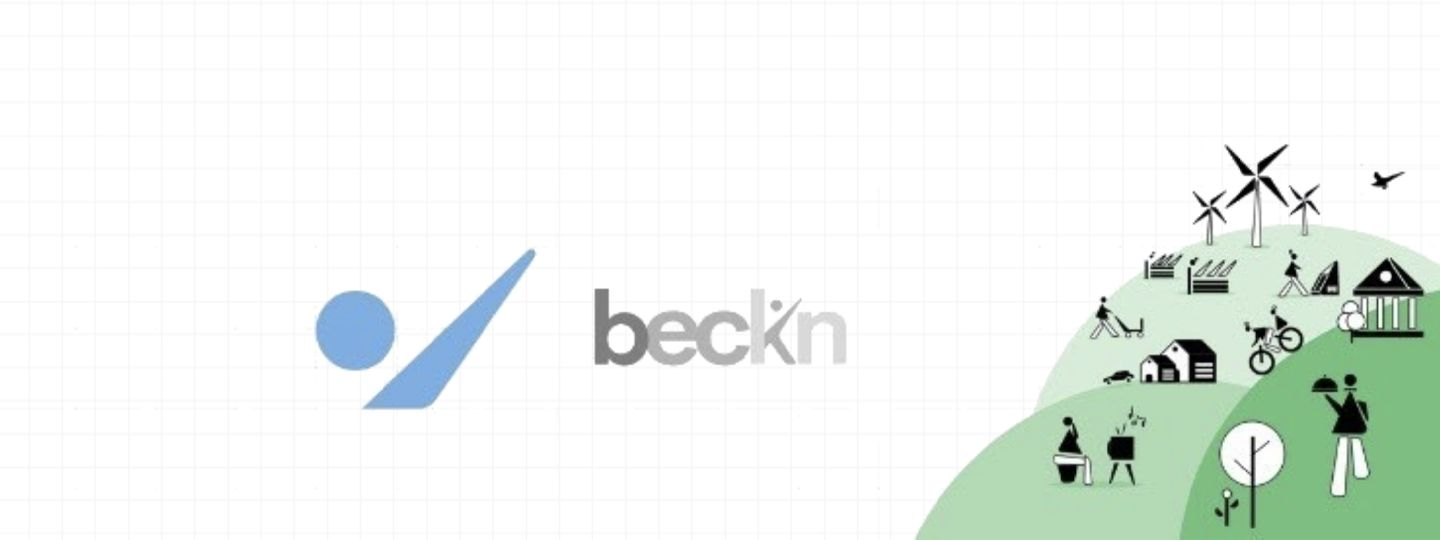

## Business Understanding

## Data Understanding

In [17]:
# Librairies
import os
import time
import glob
from warnings import filterwarnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [18]:
# Mount the google drive
from google.colab import drive
drive.mount('/content/drive')

# Ignore warnings
filterwarnings("ignore")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
path = "/content/drive/MyDrive/AI Clinic/LLM Recommendation/datas/tourism (Fozame)"

In [20]:
# A little overview of the project folder
os.listdir(path)

['datatourisme-reg-idf-20240129.csv',
 'datatourisme-reg-idf-20240130.csv',
 'datatourisme-reg-idf-20240125.csv',
 'datatourisme-reg-idf-20240131.csv',
 'datatourisme-reg-idf-20240123.csv',
 'datatourisme-reg-idf-20240126.csv',
 'Tourism Analysis data.docx',
 'Informations sur les etapes a suivre.docx',
 'Tourism Analysis data - French.docx',
 'datatourisme-reg-idf-20240129 (2).gsheet',
 'datatourisme-reg-idf-20240129 (1).gsheet',
 'datatourisme-reg-idf-20240129.gsheet']

In [21]:
data = pd.read_csv("/content/drive/MyDrive/AI Clinic/LLM Recommendation/datas/tourism (Fozame)/datatourisme-reg-idf-20240126.csv")

In [22]:
print('Shape of the final data: '+str(data.shape))
data.head()

Shape of the final data: (9526, 15)


,Nom_du_POI,Categories_de_POI,Latitude,Longitude,Adresse_postale,Code_postal_et_commune,Periodes_regroupees,Covid19_mesures_specifiques,Createur_de_la_donnee,SIT_diffuseur,Date_de_mise_a_jour,Contacts_du_POI,Classements_du_POI,Description,URI_ID_du_POI
0,Citadines Les Halles Paris,https://www.datatourisme.fr/ontology/core#Plac...,48.860666,2.346929,4 rue des Innocents,75001#Paris,NaN,NaN,Office de Tourisme de Paris,Office de Tourisme de Paris,2022-02-24,#https://www.discoverasr.com/fr/citadines/fran...,4 étoiles#Classement officiel des hébergements...,La résidence Citadines les Halles Paris est in...,https://data.datatourisme.fr/19/164332a6-a2ad-...
1,Adagio access Paris Reuilly,https://www.datatourisme.fr/ontology/core#Plac...,48.849052,2.385694,13 rue de Reuilly,75012#Paris,NaN,NaN,Office de Tourisme de Paris,Office de Tourisme de Paris,2023-09-07,#http://www.adagio-city.com/,3 étoiles#Classement officiel des hébergements...,Cette résidence de tourisme est installée dans...,https://data.datatourisme.fr/19/17ff1206-0c94-...
2,Hôtel Excelsior Opéra,https://www.datatourisme.fr/ontology/core#Plac...,48.873533,2.334512,5 rue La Fayette,75009#Paris,NaN,NaN,Office de Tourisme de Paris,Office de Tourisme de Paris,2023-04-07,#http://www.hotel-excelsior-opera.com/,3 étoiles#Classement officiel des hébergements...,L'hôtel Excelsior Opéra est installé dans un i...,https://data.datatourisme.fr/19/183f327a-8041-...
3,Hôtel Saint-Christophe,https://www.datatourisme.fr/ontology/core#Plac...,48.843751,2.352633,17 rue Lacepède,75005#Paris,NaN,NaN,Office de Tourisme de Paris,Office de Tourisme de Paris,2022-04-04,#https://hotel-saint-christophe.eu/fr/,3 étoiles#Classement officiel des hébergements...,L'hôtel Saint-Christophe se situe à proximité ...,https://data.datatourisme.fr/19/1995cc0c-9eab-...
4,Hôtel Barrière Fouquet’s Paris,https://www.datatourisme.fr/ontology/core#Plac...,48.871071,2.301312,46 avenue George V,75008#Paris,NaN,NaN,Office de Tourisme de Paris,Office de Tourisme de Paris,2023-10-06,#http://www.lefouquets-paris.com/,5 étoiles#Classement officiel des hébergements...,L'hôtel Barrière Le Fouquet's Paris est instal...,https://data.datatourisme.fr/19/19da02ad-f33f-...


In [23]:
# Number of hotels we have
print("We have {} hotels in the data".format(data["Nom_du_POI"].nunique()))

# Visualize description for Hôtel Barrière Fouquet’s Paris
print(data['Description'].iloc[4])

We have 9099 hotels in the data
L'hôtel Barrière Le Fouquet's Paris est installé dans immeuble Napoléon III du cœur de Paris. Ses chambres et suites - tons beiges et or, boiseries en acajou - sont haut de gamme. Elles sont dotées d'un dressing et d'une salle de bains en marbre. L'hôtel possède trois bars raffinés et un jardin privé. Ils proposent la dégustation de cocktails et de champagnes d'exceptions. Sa célèbre brasserie s'ouvre sur les Champs-Élysées. L'établissement abrite un spa, un sauna et une piscine.


In [24]:

def plot_text(corpus, title):
  """
  This function allows you to visualize the words that appear the most in the dataset

  Args:
  - corpus (str) : Contains a array of values
  - title (str): Name of the column we need to plot

  Returns:
  None

  """
  wordcloud = WordCloud(background_color = "black", max_words = 50).generate(corpus)

  # Figure
  fig, ax = plt.subplots()
  fig.set_size_inches(6,5)
  ax.set_title(f"Words appearing the most in {title}")
  ax.imshow(wordcloud)
  ax.axis("off")
  plt.show()

def missing_distribution_plot(data, x = 10, y = 5, palette = None):
  """
  Cette fonction permet de visualiser via un barplot la distribution des valeurs manquantes

  Args:
  - data (pd.DataFrame) : Donnee a visualiser
  - x (int) : La valeur de l'Axe des abscisees de la figure
  - y (int) : La valeur de l'Axe des ordonnees de la figure
  - palette (string) : Correspond au style grahique predefinie par seaborn

  Returns:
  None

  """
  # Create the figure
  plt.figure(figsize=(x,y))
  ax = sns.barplot(data.isnull().mean() * 100, palette = palette)
  plt.title('Missing values distribution')
  plt.ylabel('Percentage of missing values')

  # Add percentages of all bars
  for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

  # Plot the figure
  plt.xticks(rotation = 90)
  plt.show()

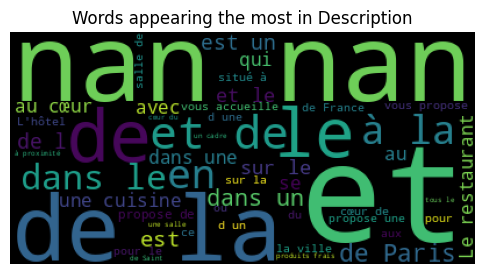

In [25]:
corpus = " ".join(data.Description.astype(str).values) # We have also numeric value so we need to convert in string
plot_text(corpus, "Description")

We can visualize here the words that appear the most in the description but we see that we have *nan* which represents the missing keys. They are clearly visible, this means that we have a lot of missing values in our dataset.

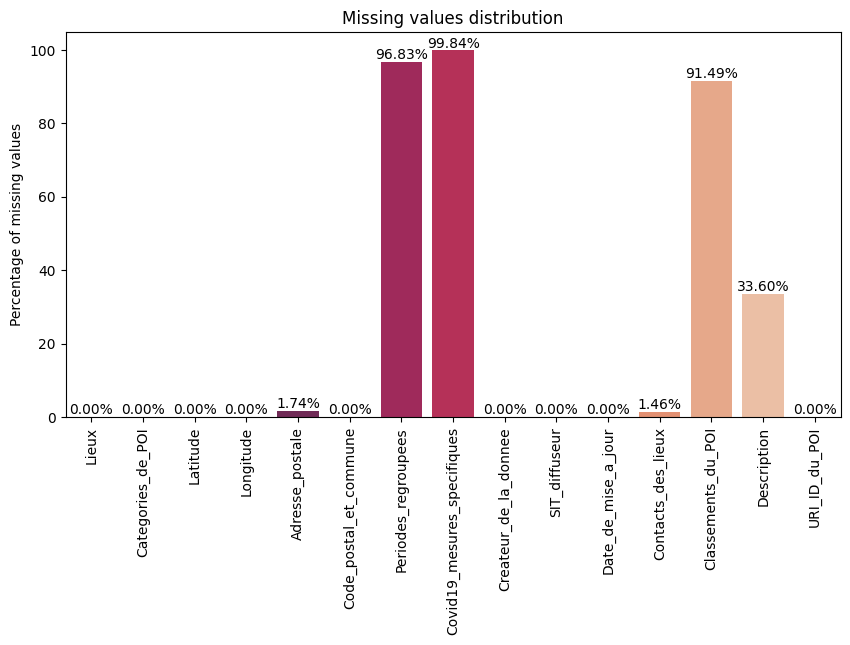

In [26]:
# Rename
old_list_rename = ['Nom_du_POI', 'Contacts_du_POI']
new_list_rename = ['Lieux', 'Contacts_des_lieux']

for i in range(len(old_list_rename)):
  data = data.rename(columns = {old_list_rename[i] : new_list_rename[i]})

# Figure
missing_distribution_plot(data, palette = 'rocket')

Indeed, we are dealing with a significant amount of missing values. What can we do in this situation?

Firstly, columns with more than 50% missing values are unusable and will be dropped. As for the remaining columns, since they are categorical, interpolation techniques without changing the categorical type to quantitative are challenging to use and could potentially bias the model. Therefore, we will simply remove the missing observations altogether.

We can afford to do this because we have a sufficient quantity of data for recommendation purposes.

## Data Preparation

In [27]:
# This algorithm will clean the data
columns_to_delete = ['Categories_de_POI', 'Periodes_regroupees', 'Covid19_mesures_specifiques', 'Createur_de_la_donnee', 'SIT_diffuseur', 'Date_de_mise_a_jour', 'URI_ID_du_POI']
data = data.drop(columns_to_delete, axis = 1)

# Drop miss observations in Adresse and Code postal before merge them
data.dropna(subset=['Adresse_postale', 'Contacts_des_lieux'], inplace = True)

# Operation on Adresse and Code postal
data['Code_postal_et_commune'] = data['Code_postal_et_commune'].str.replace('#',' ')
data['Adresse'] = data['Adresse_postale'] + ', ' +  data['Code_postal_et_commune']
data.drop(['Adresse_postale', 'Code_postal_et_commune'], axis = 1) # Not useful
# Operation on Contacts_du_POI
data['Contacts_des_lieux'] = data['Contacts_des_lieux'].str.replace('#',' ')


# At this level we will drop Classements_du_POI	columns cuz it have a lot of missing values
data = data.drop('Classements_du_POI', axis = True)

# Delete rows for Description column
data.dropna(subset=['Description'], inplace = True)

In [28]:
print(data.shape)
data.head(3)

(6040, 8)


,Lieux,Latitude,Longitude,Adresse_postale,Code_postal_et_commune,Contacts_des_lieux,Description,Adresse
0,Citadines Les Halles Paris,48.860666,2.346929,4 rue des Innocents,75001 Paris,https://www.discoverasr.com/fr/citadines/fran...,La résidence Citadines les Halles Paris est in...,"4 rue des Innocents, 75001 Paris"
1,Adagio access Paris Reuilly,48.849052,2.385694,13 rue de Reuilly,75012 Paris,http://www.adagio-city.com/,Cette résidence de tourisme est installée dans...,"13 rue de Reuilly, 75012 Paris"
2,Hôtel Excelsior Opéra,48.873533,2.334512,5 rue La Fayette,75009 Paris,http://www.hotel-excelsior-opera.com/,L'hôtel Excelsior Opéra est installé dans un i...,"5 rue La Fayette, 75009 Paris"


In [29]:
for i in range(len(data.isnull().sum())):
  if data.isnull().sum()[i] == 0:
    print('No missing values')
    break
  else:
    missing_distribution_plot(data = data, palette = 'rocket')
    break

No missing values


On va assembler les colonnes textes et importantes a savoir **Adresse, Contacts_des_lieux, Description** pour avoir une seule colonne textuelle sur laquelle on pourra effectuer toutes nos differentes manipulations.

La colonne **Lieux** va servir de label ou bien de target qui permettra de modeliser une relation entre les les contacts des lieux, les adresses et les descriptions.

Train data shape = (6040,)
Labels data shape = (6040,)


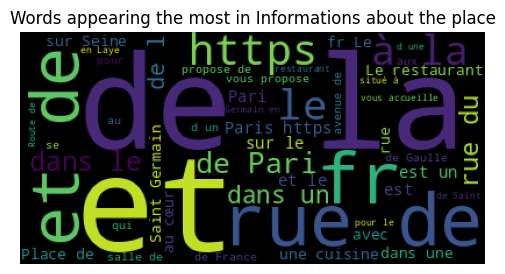

In [30]:
# Here we will concat all columns together

data["text"] =  data["Adresse"] + data["Contacts_des_lieux"] + data["Description"]
trains = data["text"].copy()
labels_name = data["Lieux"]
print("Train data shape = {}".format(trains.shape))
print("Labels data shape = {}".format(labels_name.shape))

# create wordcloud
corpus_text = " ".join(trains.astype(str).values)
plot_text(corpus_text, "Informations about the place")

In [31]:
concat_data = pd.concat([trains, labels_name], axis = 1)
concat_data['unique_id'] = range(len(concat_data))
concat_data.head()

,text,Lieux,unique_id
0,"4 rue des Innocents, 75001 Paris https://www.d...",Citadines Les Halles Paris,0
1,"13 rue de Reuilly, 75012 Paris http://www.adag...",Adagio access Paris Reuilly,1
2,"5 rue La Fayette, 75009 Paris http://www.hotel...",Hôtel Excelsior Opéra,2
3,"17 rue Lacepède, 75005 Paris https://hotel-sai...",Hôtel Saint-Christophe,3
4,"46 avenue George V, 75008 Paris http://www.lef...",Hôtel Barrière Fouquet’s Paris,4


In [32]:
# Save the data
concat_data.to_csv("recommend_place.json")
concat_data.to_csv("recommend_place.txt")

# Save numpy format
data_array = concat_data.to_numpy()
np.save('beckn_place.npy', data_array)
print('Data saved ...')

Data saved ...


**Conclusion:**

In this section, we comprehensively understood the data, preprocessed it, visualized it, and gained insights into modeling for our recommendation system engine.

Given that the data is categorical, we will convert each word into numerical form, resulting in a large matrix where each column represents a word and its occurrences.

We have several vectorization techniques that we will explore further.

It's also worth noting that we will visualize the entire dataset in 2D and 3D to graphically explore the various relationships.